# Homework assignment: Exploratory data analysis and hypotheses testing

## 1. Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, chi2_contingency
from statsmodels.stats.oneway import anova_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

plt.style.use('seaborn')

### Data cleaning

In [2]:
#load the shopping data
shopping_raw = pd.read_csv('03_Assignment_data.csv', sep=';')

Before cleaning the data, let's have a glimpse into the data.

In [3]:
#first five records
shopping_raw.head(5)

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,Amount_Wines,Amount_Fruits,Amount_Beers,Amount_Meat,Amount_Vegetables,Amount_Fish,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2
0,5524,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,8,10,4,0
1,2174,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,1,1,2,0
2,4141,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,8,2,10,0
3,6182,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,0,4,0
4,5324,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,3,6,0


In [4]:
#last five records
shopping_raw.tail(5)

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,Amount_Wines,Amount_Fruits,Amount_Beers,Amount_Meat,Amount_Vegetables,Amount_Fish,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2
2235,10870,1967,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,9,3,4,0
2236,4001,1946,PhD,Together,64014.0,2,1,406,0,30,0,0,8,8,2,5,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,2,3,13,0
2238,8235,1956,Master,Together,69245.0,0,1,428,30,214,80,30,61,6,5,10,0
2239,9405,1954,PhD,Married,52869.0,1,1,84,3,61,2,1,21,3,1,4,0


In [5]:
#check the columns
print(shopping_raw.columns)

Index(['ID', 'Year_of_Birth', 'Highest_Qualification', 'Marital_Status',
       'Income', 'Kids_home', 'Teen_home', 'Amount_Wines', 'Amount_Fruits',
       'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', 'Amount_Fish',
       'No._WebPurchases', 'No._CatalogPurchases', 'No._StorePurchases',
       'AcceptedCmp2'],
      dtype='object')


In [6]:
print(shopping_raw.shape)

(2240, 17)


The dataset has 2240 rows and 17 columns.

Then check the table schema, its columns, rows, data types, and missing values.

In [7]:
shopping_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_of_Birth          2240 non-null   int64  
 2   Highest_Qualification  2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kids_home              2240 non-null   int64  
 6   Teen_home              2240 non-null   int64  
 7   Amount_Wines           2240 non-null   int64  
 8   Amount_Fruits          2240 non-null   int64  
 9   Amount_Beers           2240 non-null   int64  
 10  Amount_Meat            2240 non-null   int64  
 11  Amount_Vegetables      2240 non-null   int64  
 12  Amount_Fish            2240 non-null   int64  
 13  No._WebPurchases       2240 non-null   int64  
 14  No._CatalogPurchases   2240 non-null   int64  
 15  No._

In the preceding output, we can see that there are 17 columns in the data. Out of these, 1 column (Income) has missing values, 2 columns (Highest_Qualification and Marital_Status) are Strings, 1 is float, and 14 are of datatype integer.
Then, take a look at the descriptive statistics of the data using the describe function.

In [8]:
shopping_raw.describe()

,ID,Year_of_Birth,Income,Kids_home,Teen_home,Amount_Wines,Amount_Fruits,Amount_Beers,Amount_Meat,Amount_Vegetables,Amount_Fish,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,0.013393
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,0.114976
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,1.000000


From these results, we can see the central tendency as well as the range of the numerical data. We can already tell that the column `Year_of_Birth` needs further analysis because there seems to be outliers, for an active customer is highly unlikely to be born in 1893. Let's also have a look at the descriptive statistics of the columns of "object" datatype:

In [9]:
shopping_raw.describe(include='O')

,Highest_Qualification,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


We can see that most of the customers are with graduation and are married. Then check unique values of the `Highest_Qualification`, `Marital_Status`, `Kids_home`, `Teen_home` and `AcceptedCmp2` column to see if there are any unreasonable and noisy data.

In [10]:
print('Unique values of column "Highest_Qualification": {}'.format(shopping_raw.Highest_Qualification.unique()))
print('Unique values of column "Marital_Status": {}'.format(shopping_raw.Marital_Status.unique()))
print('Unique values of column "Kids_home": {}'.format(shopping_raw.Kids_home.unique()))
print('Unique values of column "Teen_home": {}'.format(shopping_raw.Teen_home.unique()))
print('Unique values of column "AcceptedCmp2": {}'.format(shopping_raw.AcceptedCmp2.unique()))

Unique values of column "Highest_Qualification": ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values of column "Marital_Status": ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values of column "Kids_home": [0 1 2]
Unique values of column "Teen_home": [0 1 2]
Unique values of column "AcceptedCmp2": [0 1]


The values of these columns are all resonable and do not need further cleaning.

Next, let's handel the missing data and the outliers.

In [11]:
shopping_raw.isna().any()

ID                       False
Year_of_Birth            False
Highest_Qualification    False
Marital_Status           False
Income                    True
Kids_home                False
Teen_home                False
Amount_Wines             False
Amount_Fruits            False
Amount_Beers             False
Amount_Meat              False
Amount_Vegetables        False
Amount_Fish              False
No._WebPurchases         False
No._CatalogPurchases     False
No._StorePurchases       False
AcceptedCmp2             False
dtype: bool

Consistent with our perious overview, `Income` column has missing values. We could simply replace the NAN with the mean of it, however, to make the outcome more precise, we will instead calculate the average income of customers of groups with different highest qualifications, and then replace the `Income` null values with the mean `Income` value of that particular customer group.

In [12]:
income_groups = shopping_raw.groupby('Highest_Qualification').Income.mean()
income_groups

Highest_Qualification
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

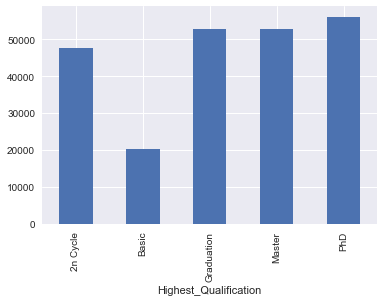

In [13]:
income_groups.plot(kind='bar')
plt.show()

Indeed, `Income` varies among customers with different educational qualifications as this bar plot suggests.

In [14]:
shopping_raw.loc[shopping_raw.Income.isna()]['Highest_Qualification'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master'], dtype=object)

In [15]:
def impute_income(cols):
    '''
    returns the average income of different educational qualifications groups
    '''
    highest_qualification = cols[0]
    income = cols[1]
    
    if pd.isna(income):
        
        if highest_qualification == 'Graduation':
            return income_groups['Graduation']
        elif highest_qualification == 'PhD':
            return income_groups['PhD']
        elif highest_qualification == '2n Cycle':
            return income_groups['2n Cycle']
        elif highest_qualification == 'Master':
            return income_groups['Master']
        
    else:
        return income

In [16]:
shopping_raw['Income'] = shopping_raw[['Highest_Qualification', 'Income']].apply(impute_income, axis=1)

In [17]:
#check na again
shopping_raw.Income.isna().any()

False

Let's use boxplots to detect the potential outliers as individual points.

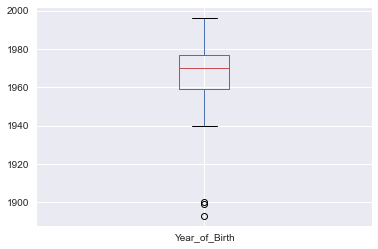

In [18]:
plt.figure(figsize=(6,4))
shopping_raw.boxplot('Year_of_Birth')
plt.show()

Outliers are displayed.

In [19]:
shopping_raw.Year_of_Birth.sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
747     1995
1850    1995
696     1995
1170    1996
46      1996
Name: Year_of_Birth, Length: 2240, dtype: int64

An active customer with the year of birth beyond 1900 is highly unlikely and we treat these data as noises and thus drop these observations.

In [20]:
shopping_raw.drop(index=shopping_raw[shopping_raw.Year_of_Birth <= 1900].index, inplace=True)

In [21]:
#unreasonable age cleaned
shopping_raw.loc[shopping_raw.Year_of_Birth <= 1900, 'Year_of_Birth'].count()

0

For the other numerical columns (except `Kids_home`, `Teen_home`, `AcceptedCmp2`), we log-scale the y-axis to make the boxplot more readable.

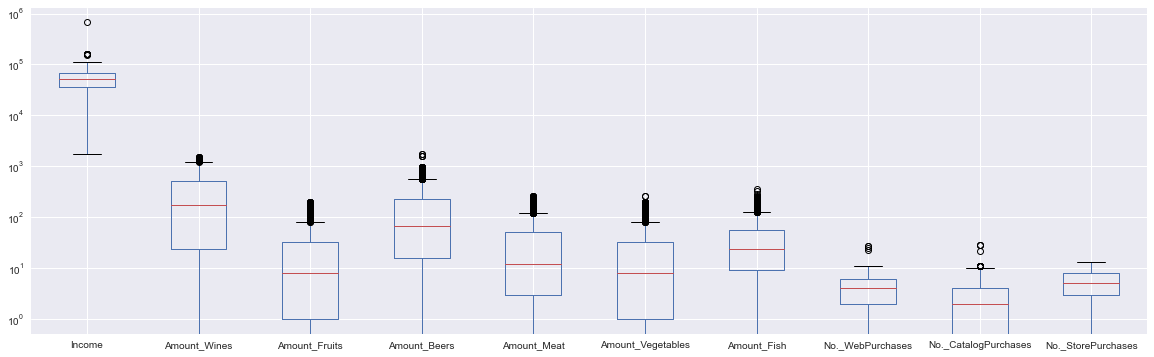

In [22]:
plt.figure(figsize=(20,6))
shopping_raw.boxplot(['Income', 'Amount_Wines','Amount_Fruits', 'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', \
                      'Amount_Fish', 'No._WebPurchases', 'No._CatalogPurchases', 'No._StorePurchases'])
plt.yscale('log')
plt.show()

As the boxplots suggest, there are outliers in the dataset (dots beyond the Whiskers), for example in column `Income`, `Amount_Wines`,`Amount_Fruits`, `Amount_Beers`, `Amount_Meat`, `Amount_Vegetables`, `Amount_Fish`, `No._WebPurchases`, `No._CatalogPurchases`. However, these outliers are valid data points derived from a heavy-tailed distribution or rare events, so we will use the "winsorizing" technique to handle them by replacing all the outliers with the inter quartile range multiplied by 1.5, i.e. 1.5 x (q75% - q25%) (Inter-quartile-range rule). In this way, we can keep all observations remain in the dataset that may contain useful information.

We will create a winsorizing() function and perform the manipulation on the above mentioned columns:

In [23]:
def winsorizing(df, column):
    '''
    use the "winsorizing" technique to replace outliers of a column 
    with the inter quartile range multiplied by 1.5
    '''
    q25, q75 = np.quantile(df[column], [0.25, 0.75])
    iqr = q75 - q25
    lower_limit, upper_limit = q25 - 1.5*iqr, q75 + 1.5*iqr
    df.loc[df[column]<lower_limit, column] = lower_limit
    df.loc[df[column]>upper_limit, column] = upper_limit
    print(f'The "{column}" column is winsorized.')

In [24]:
#the columns to be manipulated
col_towinsorize = ['Income', 'Amount_Wines','Amount_Fruits', 'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', \
                   'Amount_Fish', 'No._WebPurchases', 'No._CatalogPurchases', 'No._StorePurchases']

In [25]:
#create a new data set by making a copy of "shopping_raw" and perform winsorizing on it, so that shopping_raw stays untouched
shopping = shopping_raw.copy()

for column in col_towinsorize:
    winsorizing(shopping, column)

The "Income" column is winsorized.
The "Amount_Wines" column is winsorized.
The "Amount_Fruits" column is winsorized.
The "Amount_Beers" column is winsorized.
The "Amount_Meat" column is winsorized.
The "Amount_Vegetables" column is winsorized.
The "Amount_Fish" column is winsorized.
The "No._WebPurchases" column is winsorized.
The "No._CatalogPurchases" column is winsorized.
The "No._StorePurchases" column is winsorized.


Let's view the winsorized dataset:

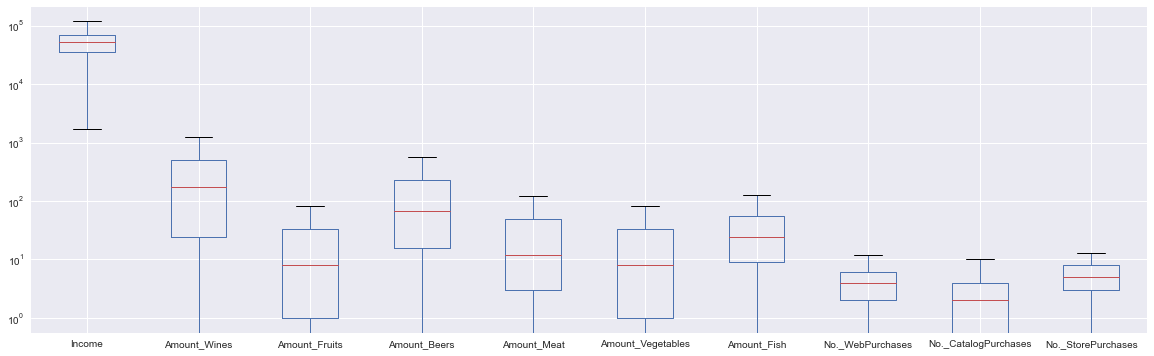

In [26]:
plt.figure(figsize=(20,6))
shopping.boxplot(col_towinsorize)
plt.yscale('log')
plt.show()

As the boxplot of the new dataset suggests, there are no more outliers.
After data cleaning, we now transform the data.

**Change the data in `Martial_Status`**

In [27]:
#Create mappings and replace
mappings = {
            'Married':'Relationship', 
            'Together':'Relationship',
            'Divorced':'Single', 
            'Widow':'Single', 
            'Alone':'Single', 
            'YOLO':'Single', 
            'Absurd':'Single'
}
shopping.Marital_Status = shopping.Marital_Status.replace(mappings)

In [28]:
#check the unique values in "Martial_Status"
print(shopping.Marital_Status.unique())

['Single' 'Relationship']


**Add a new column ‘kids’, which indicates if the customer has kids or teens.**

The logic of this transformation is, if there are any kids or teens in the family, the new attribute "kids" is True, otherwise False. We then drop `Kids_home`, `Teen_home` after the transformation.

In [29]:
shopping['kids'] = (shopping.Kids_home + shopping.Teen_home) >= 1
shopping.drop(columns=['Kids_home', 'Teen_home'], inplace=True)

**Add a new column ‘revenue’ which is the sum of 'Amount_Wines', 'Amount_Fruits', 'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', 'Amount_Fish'**

In [30]:
amount_list = ['Amount_Wines', 'Amount_Fruits', 'Amount_Beers', 'Amount_Meat', 'Amount_Vegetables', 'Amount_Fish']
shopping['revenue'] = shopping[amount_list].sum(1)
shopping.drop(columns=amount_list, inplace=True)

An overview of the cleaned and transformed data:

In [31]:
shopping.head()

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2,kids,revenue
0,5524,1957,Graduation,Single,58138.0,8,10,4.0,0,False,1551.5
1,2174,1954,Graduation,Single,46344.0,1,1,2.0,0,True,27.0
2,4141,1965,Graduation,Relationship,71613.0,8,2,10.0,0,False,776.0
3,6182,1984,Graduation,Relationship,26646.0,2,0,4.0,0,True,53.0
4,5324,1981,PhD,Relationship,58293.0,5,3,6.0,0,True,422.0


In [32]:
shopping.describe()

,ID,Year_of_Birth,Income,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,AcceptedCmp2,revenue
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,51870.451909,4.063031,2.624497,5.794367,0.013411,568.160259
std,3245.118591,11.701917,20937.880606,2.647957,2.734901,3.250940,0.115052,546.633367
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2829.000000,1959.000000,35523.000000,2.000000,0.000000,3.000000,0.000000,69.000000
50%,5455.000000,1970.000000,51569.000000,4.000000,2.000000,5.000000,0.000000,395.000000
75%,8427.000000,1977.000000,68281.000000,6.000000,4.000000,8.000000,0.000000,990.000000
max,11191.000000,1996.000000,117418.000000,12.000000,10.000000,13.000000,1.000000,2098.500000


The measurement scale of each attribute in the preprocessed data set:

1. `id`, `Marital_Status`, `AcceptedCmp2` and `kids` are nominal data, because the levels of these categorical variables do not have an inherent ordering to them, also we can’t get a precise mathematical difference between the values. They are used to label variables, that have no quantitative value.
2. `Highest_Qualification` is ordinal data that are labels with a meaningful order or ranking and represent discrete as well as ordered units (for example here Phd > Master), the magnitude between successive values is yet not known.
2. `Year_of_Birth` is interval data, "year" is interval value representing ordered units in form of integer, the distance between numbers/units is equal overall levels and there is no true zero.
3. `Income`, `No._WebPurchases`, `No._CatalogPurchases` , `No._StorePurchases` and `revenue` are ratio data, because the values are also ordered units that have the same difference and an absolute zero, all arithmetic rules and functions can be applied.

## 2. Data Visualization

2.1 To visualize the distribution of customers according to their marital status, a count plot or pie plot will be the right choice, where x-axis represents the categories, y-axis the corresponding value.

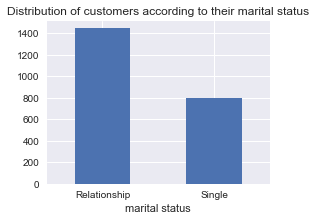

In [33]:
#count plot
plt.figure(figsize=(4,3))
shopping.Marital_Status.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Distribution of customers according to their marital status')
plt.xlabel('marital status')
plt.show()

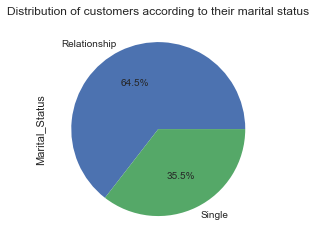

In [34]:
#pie plot
shopping.Marital_Status.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of customers according to their marital status')
plt.show()

We can see that the number of customers who are in a relationship approximately makes up close to 2/3 of all the customers.

2.2 To visualize the distribution of customer’s income according to their marital status, we choose boxplot to understand the distribution of each variable with its quartiles.

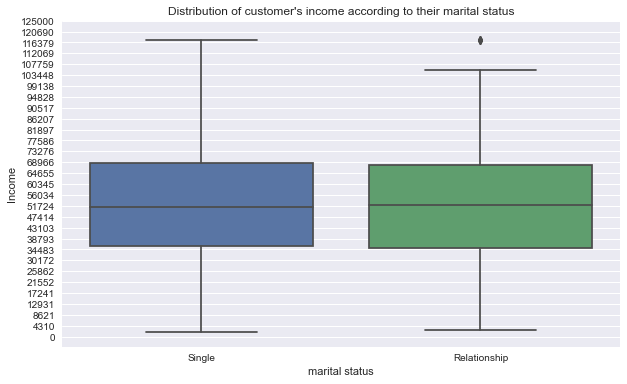

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=shopping, x='Marital_Status', y='Income')
plt.title("Distribution of customer's income according to their marital status")
plt.xlabel('marital status')
plt.yticks(np.linspace(0, 125000, num=30))
plt.show()

According to this boxplot, there is no major difference of income distributions between customers of different marital status (with median of around 51000, 25% quartile of 35000 and 75% quartile of 68000), except that there is a high-income outlier in the "Relationship" group. 

Besides, we can also get an overview of the distributions using histograms seperated on `Marital_Status`:

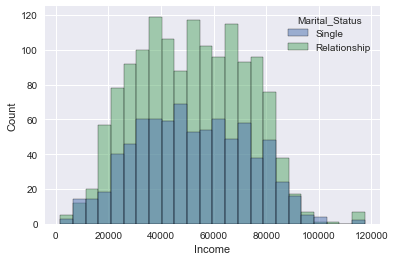

In [36]:
sns.histplot(data=shopping, x='Income', hue='Marital_Status')
plt.show()

2.3 We also choose boxplot, histograms as well as kdeplot to visualize the distribution of the revenue for customers with kids and without kids.

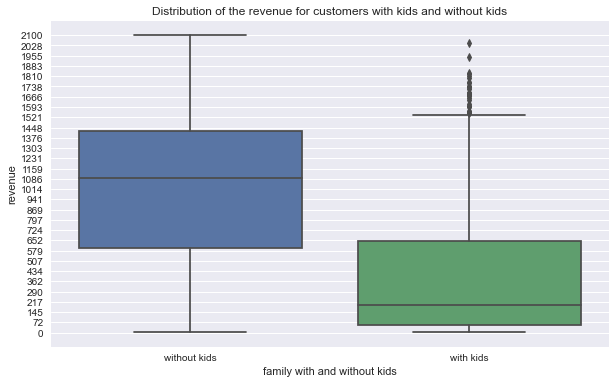

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(data=shopping, x='kids', y='revenue')
plt.title("Distribution of the revenue for customers with kids and without kids")
plt.xlabel('family with and without kids')
plt.xticks(ticks = [0, 1], labels=['without kids', 'with kids'])
plt.yticks(np.linspace(0, 2100, num=30))
plt.show()

According to this boxplot, there is a big difference of revenue distributions between customers with kids and without kids: the median of revenue for customers without kids is around 1100, 25% quartile is around 600 and 75% quartile around 1400, whereas the median of revenue for customers with kids is around 200, 25% quartile is around 50 and 75% quartile around 650. To conclude, quartiles of revenue for customers without kids are lying far above the quartiles of revenue for customers with kids. Apart from this, there exist outliers of revenue for customers with kids, while no outliers are captured in the customer group without kids.

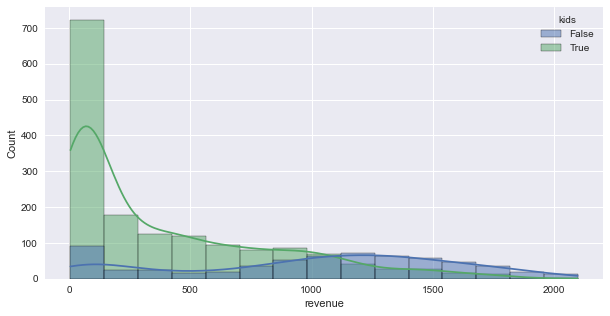

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(data=shopping, x='revenue',hue='kids', kde=True)
plt.show()

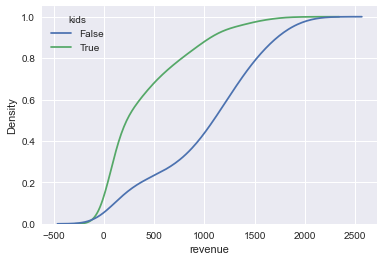

In [39]:
#cumulative distribution function
sns.kdeplot(data=shopping, x='revenue', hue='kids', cumulative=True, common_norm=False)
plt.show()

Both the histogram and the kdeplot show a big difference with regards to the distributions of revenue for customers with kids and without kids. The cumulative distribution function indicates that approximately 70% of the customers with kids only generate a revenue under 500, whereas only about 20% of the customers without kids already generate this amount of revenue. So we could conclude that customers with kids tend to spend less money and customers without kids tend to generate more revenue relatively.

## 3. Hypothesis testing

### 3.1 Do the customers with kids spend more than the customers with no kids?

According to our descriptive analysis above, customers with kids actually spend less than the customers without kids. Let's conduct a one-tailed independent t-test on this.

- H0: The average amount of money (revenue) spent by customers with kids is less than or equal to that spent by customers without kids
- H1: The average amount of money spent by customers with kids is more than that spent by customers without kids

### Preconditions for t-test
Let's check the preconditions:

1) the dependent variable should be measured on a continuous scale
<br>Yes, this is satisfied, the dependent variable revenue is continuous.<br>
2) the independent variable should consist of two categorical, independent groups
<br>Yes, this is also satisfied. The two categorical groups customers with kids and customers without kids are independent.<br>
3) there must be independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves 
<br>Yes, this is also satisfied. Because customers with kids are not in customers without kids group and vice versa.<br>
4) there should be no significant outliers 
<br>Yes, this is also satisfied. There are no data points within the data that do not follow the usual pattern.<br>
5) the dependent variable should be approximately normally distributed for each group of the independent variable
<br>The two groups are large data sets with n > 30 (see below), so according to central limit theorem – the distribution of sample means approximates a normal distribution for large data sets (n > 30), we thus assume normality. In this case, we won't perform Shapiro-Wilk test.<br>
6) there needs to be homogeneity of variances, e.g., the variance of both groups needs to be similar.
<br>We will conduct the Levene test.

#### Normal distribution (central limit theorem and large data set)

In [40]:
t_tester_withkids = shopping[shopping.kids == True]
t_tester_withoutkids = shopping[shopping.kids == False]

In [41]:
#data set with n > 30
len(t_tester_withkids)

1600

In [42]:
#data set with n > 30
len(t_tester_withoutkids)

637

#### Homogeneity of variance

Before we do the t-test, we need to check for homogeneity of variance, because this determines whether to use the t-test or the Welch-test.

Levene-Test for homogeneity of variance across groups
- H0 for Levene-Test: There is homogeneity of variance for both groups 
- H1 for Levene-Test: There is no homogeneity of variance for both groups 

In [43]:
stat, p = levene(t_tester_withkids.revenue, t_tester_withoutkids.revenue, center="median")
print("p-value: ", p)
if p < 0.05:
    print("no homogeneity, perform Welch-test")
else:
    print("homogeneity, perform standard independent 2 sample test")

p-value:  2.9031842071486795e-17
no homogeneity, perform Welch-test


The null hypothesis for this test is that there is homogeneity of variance for both groups. Because p < 0.05, the null hypothesis is rejected, we can assume that there is no homogeneity of variance among both groups. Thus, we have to perform Welch-test.

In [44]:
stat, p = ttest_ind(t_tester_withkids.revenue, t_tester_withoutkids.revenue, equal_var=False, alternative='greater')
print("p-value: ", p)

if p < 0.05:
    print("H0 rejected, customers with kids spend more than the customers with no kids")
else:
    print("H0 accepted, customers with kids spend less than or equal to the customers with no kids")

p-value:  1.0
H0 accepted, customers with kids spend less than or equal to the customers with no kids


Since the p-value is 1.0 > 0.05, we can reject the alternative hypothesis H1 and accept the null hypothesis H0, meaning that on average, customers with kids spend less than or equal to the customers without kids.

### 3.2 Are there any significant differences in the revenue for the following customer groups?
- Customers who only made purchases through the company’s website
- Customer who only made purchases directly in stores of the company
- Customer who only made purchases using a catalog
- Customers who made purchases from more than one source (website, store, catalog)

Since this question is the comparison of more than two groups based on only one independent variable (i.e. purchase source), one-way analysis of variance (ANOVA) should be conducted.

- H0: There are no significant differences in the revenue for the following customer groups.
- H1: There is a significant difference in the revenues among the four groups.

### Preconditions for ANOVA
Let's check the preconditions:

1) the dependent variable should be measured on a continuous scale
<br>Yes, this is satisfied, the dependent variable revenue is continuous.<br>
2) the independent variable should consist of three or more categorical, independent groups (e.g., purchases only made through the company’s website, directly in stores of the company, using a catalog or from more than one source)
<br>Yes, this is also satisfied. The four categorical groups are independent.<br>
3) there must be independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves 
<br>Yes, this is also satisfied. Because these groups have no overlaps with each other.<br>
4) there should be no significant outliers 
<br>Yes, this is also satisfied. There are no data points within the data that do not follow the usual pattern.<br>
5) the dependent variable should be approximately normally distributed for each group of the independent variable
<br>Two groups ("store_only" and "multi_source") are larger data sets with n > 30 (see analysis below), so according to central limit theorem – assume normality. Therefore, we will perform Shapiro-Wilk Test on data sets "web_only" and "catalog_only".<br>
6) there needs to be homogeneity of variances, e.g., the variance of the groups needs to be similar.
<br>We will conduct the Levene test.

Let's create data set for each group:

In [45]:
#first group web_only
web_only = shopping.loc[(shopping['No._WebPurchases']!=0) & \
                        (shopping['No._CatalogPurchases']==0) & \
                        (shopping['No._StorePurchases']==0)]

In [46]:
len(web_only)

5

In [47]:
#second group catalog_only
catalog_only = shopping.loc[(shopping['No._WebPurchases']==0) & \
                        (shopping['No._CatalogPurchases']!=0) & \
                        (shopping['No._StorePurchases']==0)]

In [48]:
len(catalog_only)

4

In [49]:
#third group store_only
store_only = shopping.loc[(shopping['No._WebPurchases']==0) & \
                        (shopping['No._CatalogPurchases']==0) & \
                        (shopping['No._StorePurchases']!=0)]

In [50]:
#data set with n > 30
len(store_only)

31

In [51]:
#other customers belong to the 4th group, we can get the index of this data set by using difference() function
multi_source = shopping.loc[shopping.index.difference(web_only.index).\
                            difference(catalog_only.index).\
                            difference(store_only.index)]

In [52]:
#data set with n > 30
len(multi_source)

2197

In [53]:
#check for completeness: the sum of the size of these groups should match the size of the shopping data set
len(web_only) + len(catalog_only) + len(store_only) + len(multi_source) == shopping.shape[0]

True

#### Normal distribution
As per the analysis above, we just perform Shapiro-Wilk Test on data sets "web_only" and "catalog_only", which has a sample size of less than 30.
We define a function "shapiro_test" here, which needs the dataframe and a column name as input parameter and outputs the p value of shapiro test as well as its judgement.

The null hypothesis of the Shapiro-Wilk Test is that the data is normally distributed.

In [54]:
def shapiro_test(dataframe, column_name):
    stat, p = shapiro(dataframe[column_name])
    print("p-value: ", p)
    if p < 0.05:
        print("the data is not normally distributed, further analysis needed")
    else:
        print("we can assume that the data is normally distributed")

In [55]:
shapiro_test(web_only, 'revenue')

p-value:  0.6138705015182495
we can assume that the data is normally distributed


Because p > 0.05 we can assume that the revenue data in data set "web_only" is normally distributed.

In [56]:
shapiro_test(catalog_only, 'revenue')

p-value:  0.00554959150031209
the data is not normally distributed, further analysis needed


Let's further analyse the distribution of "catalog_only" data set with a histogram:

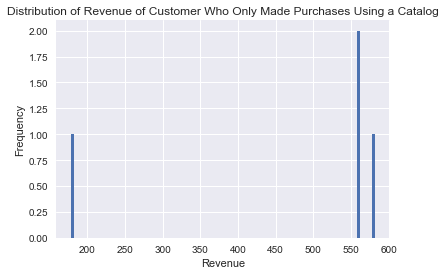

In [57]:
plt.hist(catalog_only.revenue, bins=100)
#add x-label
plt.xlabel("Revenue")
#add y-label
plt.ylabel("Frequency")
#add title
plt.title("Distribution of Revenue of Customer Who Only Made Purchases Using a Catalog")
plt.show()

We can tell from the histogram that revenue of "catalog_only" is left-skewed. So we will make transformation on this series to make it normally distributed so that the prerequisite of one-way ANOVA is satisfied. We transform the data in the following steps:
1. create a constant that is the maximum value of the revenue series of "catalog_only" data set plus one
2. reflect the left-skewed data to a new data series by multipying all values by -1 and adding the constant to the variable to set all values to at least 1.0. After this step, data are transformed to right-skewed.
3. to normalise the now right-skewed data, we perform log normalisation.

All these steps are wrapped in a function:

In [58]:
def left_skew_normalize(series): #takes the left-skewed series as input
    a = max(series) + 1
    ref_series = -1*series + a   #right-skewed reflection
    return np.log(ref_series)

In [59]:
#normalise the original data series using the function defined above
normal_cat_revenue = left_skew_normalize(catalog_only.revenue)

In [60]:
stat, p = shapiro(normal_cat_revenue)
print("p-value: ", p)
if p < 0.05:
    print("the data is not normally distributed, further analysis needed")
else:
    print("we can assume that the data is normally distributed")

p-value:  0.6803938150405884
we can assume that the data is normally distributed


Till this step, after data normalisation, we conclude that the dependent variable (revenue) is approximately normally distributed for each group of the independent variable. So the prerequisite of normal distribution is satisfied. Let's move on to the next precondition check:

#### Homogeneity of variance

Before we do one-way ANOVA, we need to check for homogeneity of variance, because this determines whether to use the normal formula or apply a Welch’s F correction.

Levene-Test for homogeneity of variance across groups
- H0 for Levene-Test: There is homogeneity of variance for all four groups 
- H1 for Levene-Test: There is no homogeneity of variance for all four groups 

In [61]:
stat, p = levene(web_only.revenue, normal_cat_revenue, store_only.revenue, multi_source.revenue, center="median")
print("p-value: ", p)
if p < 0.05:
    print("no homogeneity, perform Welch-test")
else:
    print("homogeneity, perform standard independent 2 sample test")

p-value:  4.653472907836183e-13
no homogeneity, perform Welch-test


The null hypothesis for this test is that there is homogeneity of variance among groups. Because p < 0.05, the null hypothesis is rejected, we can assume that there is no homogeneity of variance among the groups. Thus, we have to apply a Welch’s F correction.

To do this, we will combine the four groups to a simple dataframe containing the transformed data of revenue and their group labels: "web", "catalog", "store", "multi".

In [62]:
def create_dataframe(array, column, group_name):
    '''
    creates a dataframe from an array.
    input parameters: 
    1. an array
    2. the name given to the column that contains the values of the array
    3. new column inserted indicating the group of the variables
    '''
    df = pd.DataFrame(array, columns=[column])
    df.insert(1, "group", group_name)
    return df

In [63]:
df_web = create_dataframe(web_only.revenue.values, "revenue", "web only")
df_catalog = create_dataframe(normal_cat_revenue.values, "revenue", "catalog only")
df_store = create_dataframe(store_only.revenue.values, "revenue", "store only")
df_multi_source = create_dataframe(multi_source.revenue.values, "revenue", "multi source")

In [64]:
#Concatenate the newly created four groups together to an complete dataframe for Anova
df_for_anova = pd.concat([df_web, df_catalog, df_store, df_multi_source], ignore_index=True)

In [65]:
df_for_anova.head()

,revenue,group
0,49.0,web only
1,219.5,web only
2,96.0,web only
3,164.5,web only
4,32.0,web only


In [66]:
stat, p = anova_oneway(df_for_anova.revenue, df_for_anova.group, use_var='unequal', welch_correction=True)
print("p-values:", p)
print("ANOVA:", stat)
if p < 0.05:
    print("H0 Rejected, there is thus a significant difference in the revenues among the customer groups.") #Hypothesis displayed at the beginning of this sub-task
else:
    print("H0 Accepted, there are no significant differences in the revenue for the customer groups.")

p-values: 8.918742813373355e-19
ANOVA: 743.5705563692107
H0 Rejected, there is thus a significant difference in the revenues among the customer groups.


There is a statistically significant difference between the four groups as determined by one-way ANOVA (p < 0.05). However, it is not clear which is the different group and what is the size or direction of this difference, thus, a post-hoc test should be performed - we use TukeyHSD as follows:

#### ANOVA TukeyHSD Post Hoc test

In [67]:
tukey = pairwise_tukeyhsd(endog=df_for_anova.revenue, groups=df_for_anova.group, alpha = 0.05)
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1       group2     meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------
catalog only multi source   573.713 0.1497  -124.8833 1272.3093  False
catalog only   store only   41.8245 0.9989  -699.8007  783.4496  False
catalog only     web only  109.1535 0.9906  -827.2597 1045.5667  False
multi source   store only -531.8885    0.0  -784.3662 -279.4108   True
multi source     web only -464.5594 0.2236 -1089.5449   160.426  False
  store only     web only    67.329  0.994  -605.4101  740.0682  False
----------------------------------------------------------------------


The TukeyHSD post hoc test revealed that there is statistically significant difference only between the group of customer who only made purchases directly in stores of the company and the group of customers who made purchases from more than one source in terms of revenue (p < 0.05). There is no statistically significant difference detected between other groups.

### 3.3 Do more customers with kids accept an offer in the last marketing campaign?

Since this task focuses on the categorical variable AcceptedCmp2, we will conduct the chi-square test of independence to decide if customers with/without kids and the acceptance of an offer might be related or not.

The preconditions of the chi-square test is also worth noting:

1. Two categorical variables.
Yes, this is satisfied.
2. Two or more categories (groups) for each variable.
Yes, there are two groups for each variable
3. Independence of observations.
Yes, this is also satisfied. Because these groups have no overlaps with each other.
4. Relatively large sample size.
Yes, this is also satisfied (see contingency table below).

Hypotheses:
- H0: The two categorical variables are independent — that is, customers with/without kids is independent of their acceptance of an offer in the last marketing campaign.
- H1: The two categorical variables are not independent — that is, customers with/without kids is not independent of their acceptance of an offer in the last marketing campaign.

Before conducting hypothesis testing, let's conduct a simple analysis to have an overview of the situation based on a contingency table:

In [68]:
#a contingency table can be represented as follows
contingency_table = pd.crosstab(shopping.kids, shopping.AcceptedCmp2)
print(contingency_table)

AcceptedCmp2     0   1
kids                  
False          619  18
True          1588  12


We can see from this table that although there are more customers with kids than without kids, customers without kids who accepted an offer in the last marketing campaign (18) are more than customers with kids (12).

In [69]:
#Apply chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p value is " + str(p))
if p < 0.05:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.00026402890045935885
Dependent (reject H0)


As the p value suggests, H0 is rejected, the two categorical variables are thus dependent. But note that the chi-square test of independence only assesses associations between categorical variables, and can not provide any inferences about causation between the two variables.